In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('Forecasting_Dataset.csv')

In [76]:
df.shape

(689, 16)

In [77]:
df.sample(10)

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
415,416,ODISHA,Balasore,63946.34,13973.34,17134.27,25217.46,120271.41,8690.38,111581.03,60553.21,6736.43,67289.64,6581.45,43553.47,60.31
23,24,ARUNACHAL PRADESH,Tawang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
171,172,HARYANA,Charki Dadri,9974.60,2981.02,2234.87,3378.89,18569.38,1856.94,16712.44,25307.00,1368.20,26675.20,1398.00,2274.50,159.61
330,331,MADHYAPRADESH,Shahdol,47145.50,245.02,7371.51,1030.88,55792.91,3064.50,52728.41,2681.56,2081.44,4763.00,2182.44,47552.22,9.03
647,648,UTTARPRADESH,Unnao,76364.20,40341.81,0.00,70428.46,187134.46,10440.71,176693.76,100951.63,7760.66,108712.29,9223.46,66518.66,61.53
598,599,UTTARPRADESH,Farrukhabad,37290.70,5536.22,1221.68,10814.67,54863.27,4253.80,50609.47,34226.52,3809.61,38036.13,4410.24,11972.71,75.16
405,406,NAGALAND,Kohima,15455.23,1708.00,4425.95,196.00,21785.18,2178.52,19606.66,0.00,203.84,203.84,237.15,19369.51,1.04
347,348,MAHARASHTRA,Chandrapur,97204.67,4834.16,1471.94,10306.92,113817.69,5908.87,107908.82,10637.00,10228.01,20865.01,11247.56,86024.26,19.34
583,584,UTTARPRADESH,Bahraich,80478.62,14509.37,3863.07,21937.47,120788.53,6343.65,114444.88,51267.29,8747.66,60014.95,10318.62,52858.97,52.44
501,502,SIKKIM,North District,331775.32,0.00,34351.31,0.00,366126.63,287162.64,78963.99,0.00,0.00,0.00,100.70,78863.29,0.00


In [78]:
#Get information on the columns, null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   S.no.                                                                 689 non-null    int64  
 1   Name of State                                                         689 non-null    object 
 2   Name of District                                                      689 non-null    object 
 3   Recharge from rainfall During Monsoon Season                          684 non-null    float64
 4   Recharge from other sources During Monsoon Season                     684 non-null    float64
 5   Recharge from rainfall During Non Monsoon Season                      684 non-null    float64
 6   Recharge from other sources During Non Monsoon Season                 684 non-null    float64
 7  

In [79]:
df.isna().sum()


S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            5
Recharge from other sources During Monsoon Season                       5
Recharge from rainfall During Non Monsoon Season                        5
Recharge from other sources During Non Monsoon Season                   5
Total Annual Ground Water Recharge                                      5
Total Natural Discharges                                                5
Annual Extractable Ground Water Resource                                5
Current Annual Ground Water Extraction For Irrigation                   5
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            5
Annual GW Allocation for Domestic Use 

In [80]:
#statewise groundwater reserve
state_list = []
total_frnd_water_recharge = []
curr_gw_extr_list = []
future_available_GW_list = []
#Net Ground Water Availability for future use

for state, subset in df.groupby('Name of State'):
    #print(state, sum(subset['Net Ground Water Availability for future use']))
    state_list.append(state)
    total_frnd_water_recharge.append(sum(subset['Total Annual Ground Water Recharge']))
    curr_gw_extr_list.append(sum(subset['Total Current Annual Ground Water Extraction']))
    future_available_GW_list.append(sum(subset['Net Ground Water Availability for future use'])) 
dfnew = pd.DataFrame({"State":state_list, "GW_Recharge":total_frnd_water_recharge, "GW_Extraction": curr_gw_extr_list, "Future_GW_Available": future_available_GW_list})

In [81]:
dfnew.sort_values(['GW_Recharge','GW_Extraction'], inplace= True)
dfnew['annual_reserve'] = dfnew['GW_Recharge']-dfnew['GW_Extraction']
dfnew

,State,GW_Recharge,GW_Extraction,Future_GW_Available,annual_reserve
10,Diu,471.00,386.00,6.00,85.00
19,LAKSHADWEEP,1072.80,238.10,122.81,834.70
9,Daman,1304.00,635.00,480.00,669.00
5,CHANDIGARH,4216.00,3378.00,416.00,838.00
8,Dadra & Nagar Haveli,6861.59,2042.86,4475.73,4818.73
24,MIZORAM,21280.76,731.88,18092.91,20548.88
28,Puducherry,22633.18,15140.82,5473.84,7492.36
11,GOA,26722.34,5371.36,6992.81,21350.98
7,DELHI,32100.02,35990.29,2299.43,-3890.27
0,A&N ISLAND,36841.83,908.17,32131.52,35933.66


# ***Annual Reserve of Ground water by states, Green bars indicate positive annual reserve, while Red value indicates negative annual reserve.***

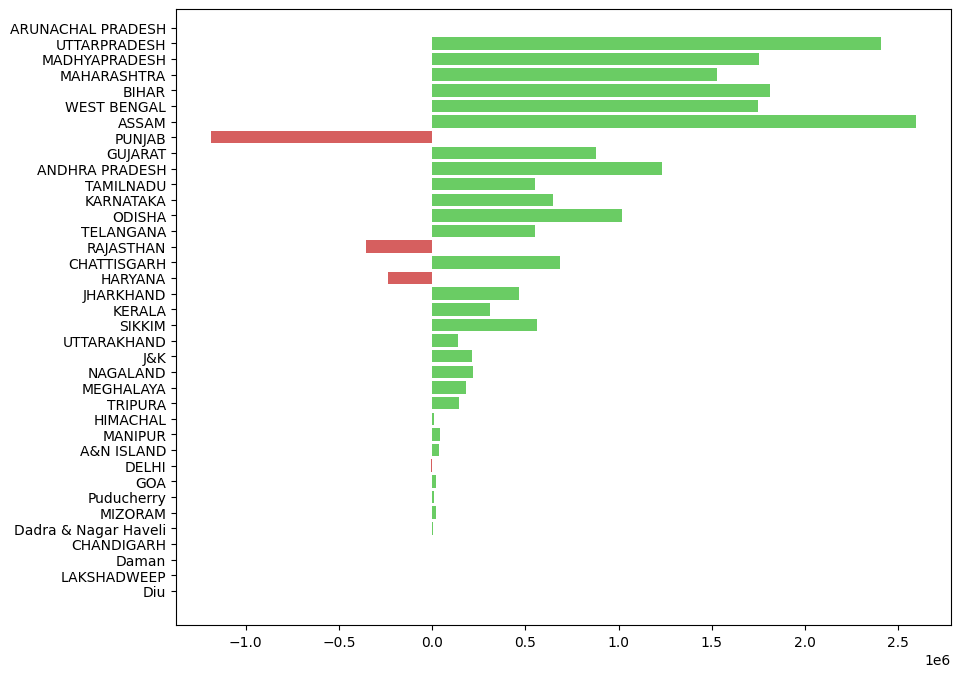

In [82]:
f, ax = plt.subplots(figsize=(10,8))
plt.barh(dfnew['State'],dfnew['annual_reserve'], color=(dfnew['annual_reserve']>0).map({True: 'g',False: 'r'}))
plt.show()

Following analysis indiates Groundwater Extraction vs Availability,Data shows Haryana, Rajasthan, Punjab, Delhi are in critial zone as Ground water Extraction is almost equal to the availability. If groundwater distribution is not planned properly, severe shortage of water can happen in future.

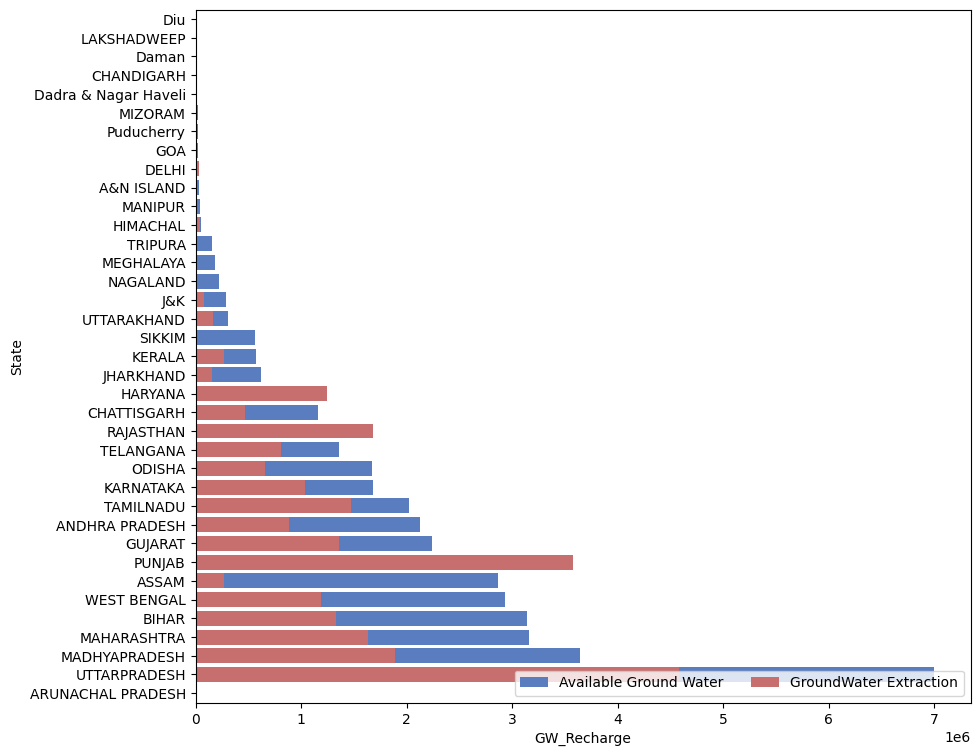

In [83]:
f, ax = plt.subplots(figsize=(10, 9))

sns.set_color_codes("muted")
sns.barplot(x='GW_Recharge', y= 'State', data = dfnew, label = 'Available Ground Water', color='b')
sns.barplot(x='GW_Extraction', y= 'State', data = dfnew, label = 'GroundWater Extraction', color='r')
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

Future Ground water availability in different states in India, No data available for ArunachalPradesh, Other than that Assam , UttarPradesh, Madhya Pradesh and Bihar has higher future Reserve.

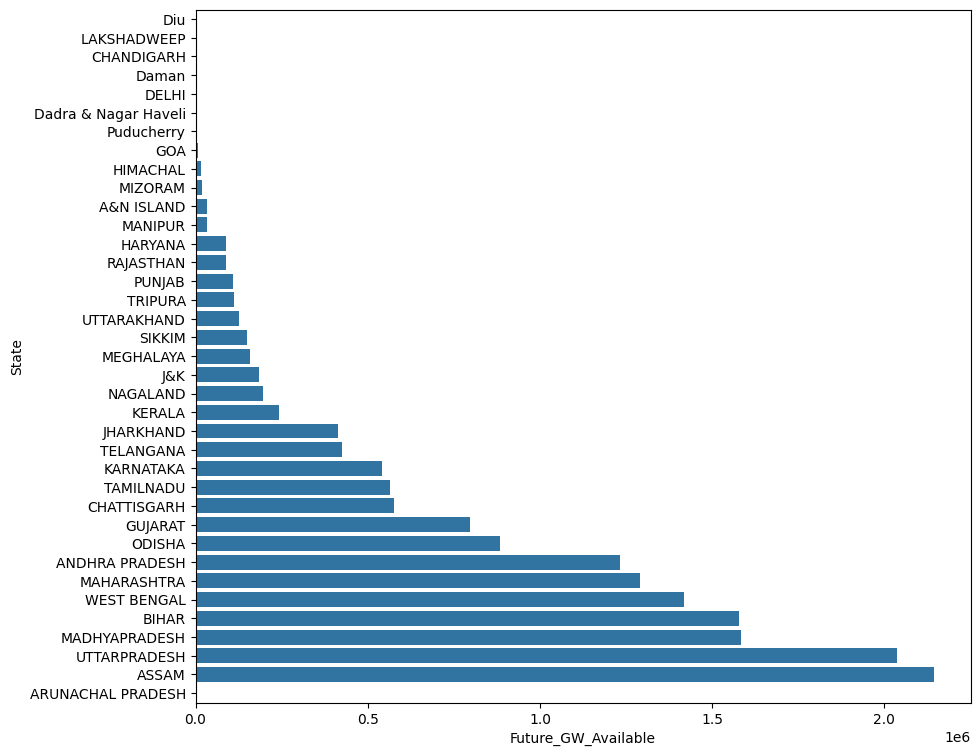

In [84]:
dfnew.sort_values('Future_GW_Available', inplace = True)
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='Future_GW_Available', y = 'State',data = dfnew)
plt.show()

In [85]:
dfnew.count()

State                  37
GW_Recharge            36
GW_Extraction          36
Future_GW_Available    36
annual_reserve         36
dtype: int64

 We will dig litter deeper and check the Distric level scenario in West-Bengal

In [86]:
df_westbengal = df[df['Name of State']=='WEST BENGAL']
df_westbengal.head()

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
653,654,WEST BENGAL,Coochbehar,185334.09,5143.37,60379.13,12100.71,262957.30,26295.71,236661.59,42261.5,4447.27,46708.77,5988.25,188411.84,20.0
654,655,WEST BENGAL,Jalpaiguri,228086.62,3939.51,65301.46,12078.29,309405.88,30940.59,278465.29,8241.2,4395.75,12636.95,5908.97,264315.12,5.0
655,656,WEST BENGAL,Darjeeling,39186.21,0.00,13052.71,0.00,52238.92,5223.89,47015.03,1169.1,1478.05,2647.15,2012.74,43833.19,6.0
656,657,WEST BENGAL,Uttar Dinajpur,91467.43,7541.41,22166.67,24353.83,145529.34,12014.51,133514.83,78133.6,4811.27,82944.87,7569.33,47811.90,62.0
657,658,WEST BENGAL,Dakshin Dinajpur,65504.74,6432.72,17257.72,18756.55,107951.73,9115.64,98836.09,50706.0,2618.71,53324.71,3349.33,44780.76,54.0


In [87]:
for state in list(df['Name of State'].unique()):
    print(state)

ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHATTISGARH
DELHI
GOA
GUJARAT
HARYANA
HIMACHAL
J&K
JHARKHAND
KARNATAKA
KERALA
MADHYAPRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ODISHA
PUNJAB
RAJASTHAN
SIKKIM
TAMILNADU
TELANGANA
TRIPURA
UTTARPRADESH
UTTARAKHAND
WEST BENGAL
A&N ISLAND
CHANDIGARH
Dadra & Nagar Haveli
Daman
Diu
LAKSHADWEEP
Puducherry


Annual Ground-water allocation estimated to the districts in West-Bengal. North-24_Parganas, Murshidabad and Burdwan are top 3 estimated districtics by Ground water allocation

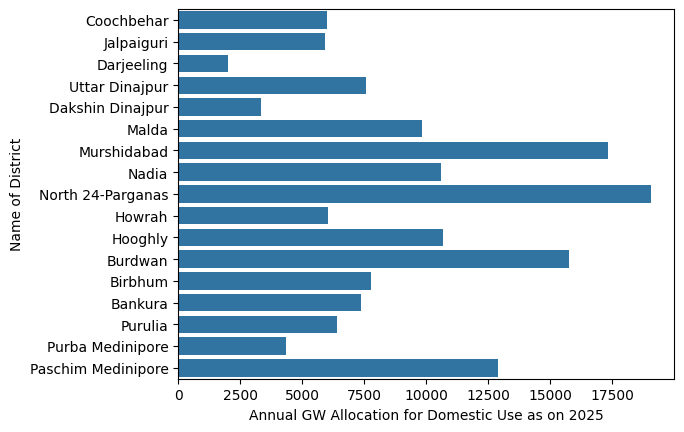

In [88]:
sns.barplot(x = 'Annual GW Allocation for Domestic Use as on 2025', y = 'Name of District', data = df[df['Name of State']=='WEST BENGAL'])
plt.show()

In [89]:
df_westbengal.sort_values('Net Ground Water Availability for future use',ascending=False, inplace = True)
df_westbengal[['Name of State','Name of District','Net Ground Water Availability for future use']].head(3)

C:\Users\0931\AppData\Local\Temp\ipykernel_14340\2034173487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_westbengal.sort_values('Net Ground Water Availability for future use',ascending=False, inplace = True)


,Name of State,Name of District,Net Ground Water Availability for future use
654,WEST BENGAL,Jalpaiguri,264315.12
669,WEST BENGAL,Paschim Medinipore,205036.12
653,WEST BENGAL,Coochbehar,188411.84


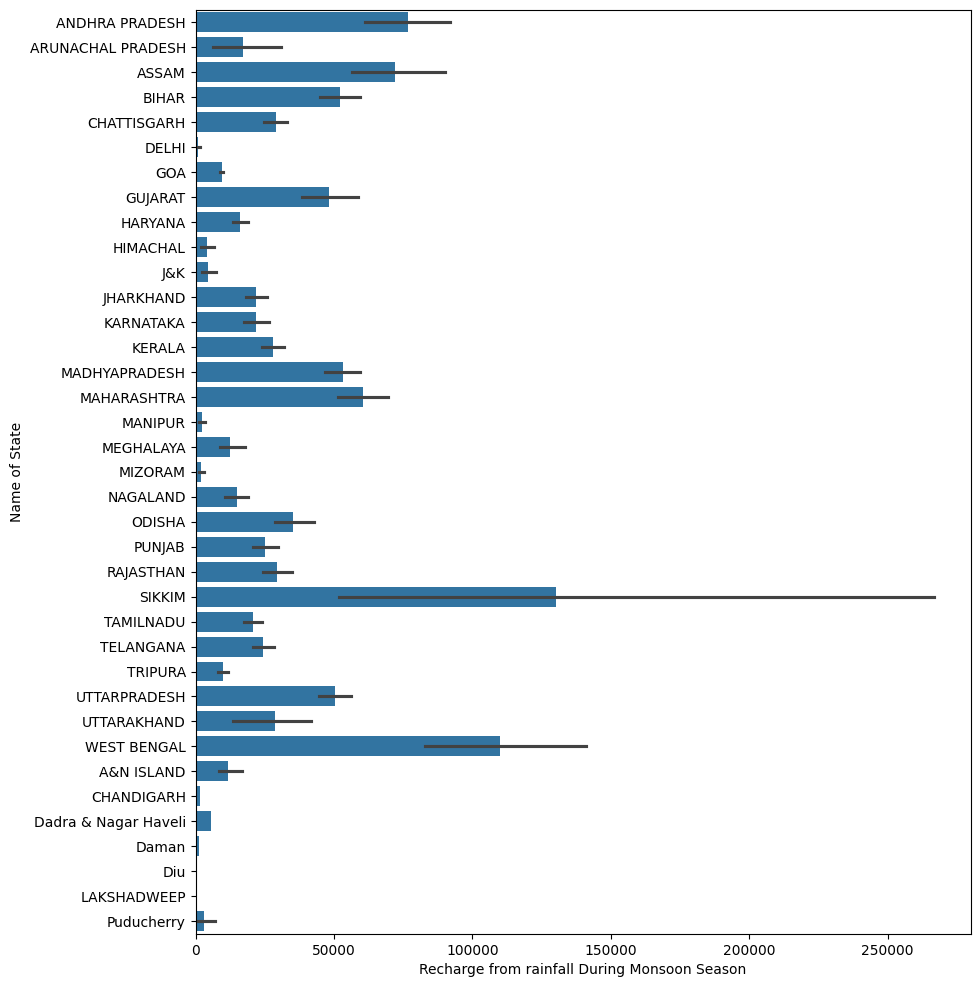

In [90]:
plt.figure(figsize=(10,12))
sns.barplot(x='Recharge from rainfall During Monsoon Season', y='Name of State', data = df)
plt.show()

State-wise Ground Water Extraction Distributions statistics.

0 UTTARPRADESH
1 MADHYAPRADESH
2 BIHAR
3 MAHARASHTRA
4 GUJARAT
5 RAJASTHAN
6 TAMILNADU
7 TELANGANA
8 ODISHA
9 KARNATAKA
10 ASSAM
11 CHATTISGARH
12 JHARKHAND
13 J&K
14 HARYANA
15 PUNJAB
16 WEST BENGAL
17 ARUNACHAL PRADESH
18 KERALA
19 ANDHRA PRADESH
20 DELHI
21 NAGALAND
22 MEGHALAYA
23 MANIPUR
24 LAKSHADWEEP
25 TRIPURA
26 MIZORAM
27 HIMACHAL
28 UTTARAKHAND
29 SIKKIM
30 A&N ISLAND
31 Puducherry
32 GOA
33 CHANDIGARH
34 Dadra & Nagar Haveli
35 Daman


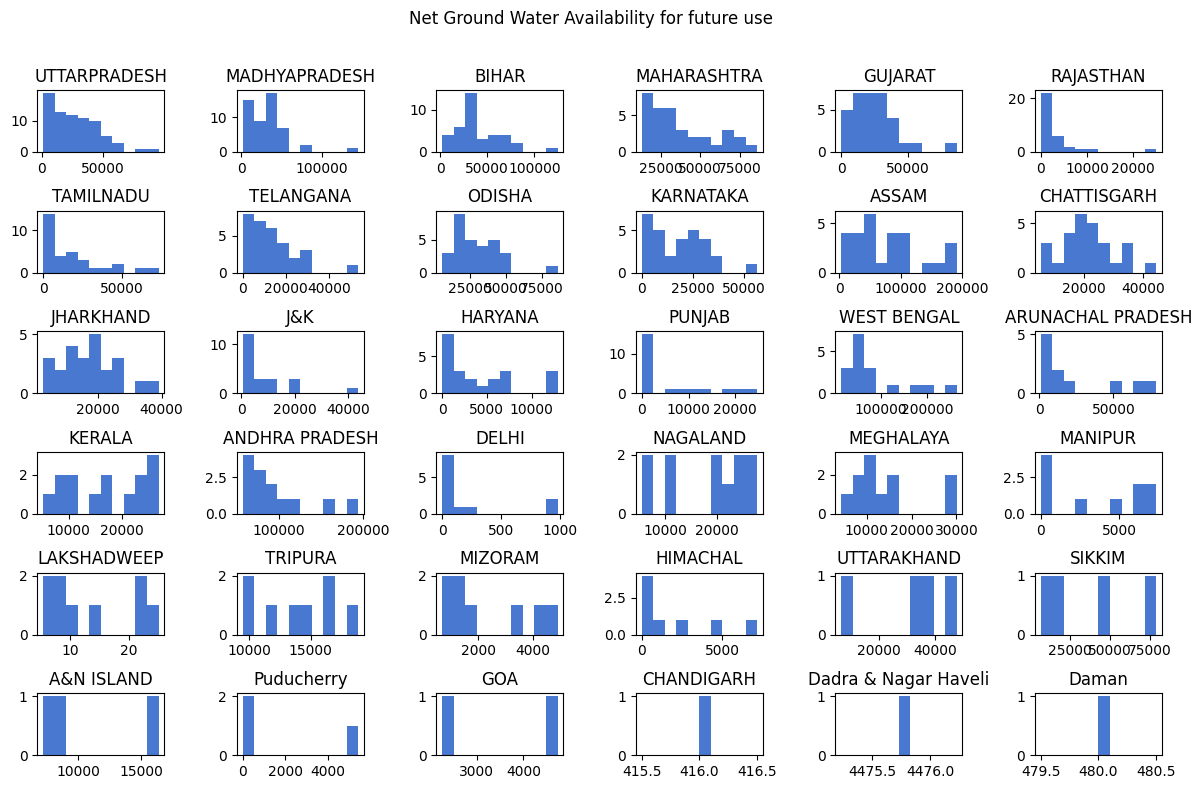

In [91]:
fig,axs = plt.subplots(6,6,figsize=(12,8))

for idx,state in enumerate(df['Name of State'].value_counts().sort_values(ascending=False)[0:36].index):
    print(idx,state)
    axs[idx//6,idx%6].hist(x = df[df['Name of State']==state]['Net Ground Water Availability for future use'], color='b')
    axs[idx//6,idx%6].set_title(state)
plt.suptitle("Net Ground Water Availability for future use")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [92]:
# Check for missing values
missing_values = df.isna().sum()

# Fill missing values with median (for numerical data) and mode (for categorical data)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\0931\AppData\Local\Temp\ipykernel_14340\3949680564.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\0931\AppData\Local\Temp\ipykernel_14340\3949680564.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [93]:
#label encoding the data.
# Convert categorical columns to numerical using label encoding if needed
from sklearn.preprocessing import LabelEncoder
# Store original column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")

Mapping for column 'Name of State':
Label 0: A&N ISLAND
Label 1: ANDHRA PRADESH
Label 2: ARUNACHAL PRADESH
Label 3: ASSAM
Label 4: BIHAR
Label 5: CHANDIGARH
Label 6: CHATTISGARH
Label 7: DELHI
Label 8: Dadra & Nagar Haveli
Label 9: Daman
Label 10: Diu
Label 11: GOA
Label 12: GUJARAT
Label 13: HARYANA
Label 14: HIMACHAL
Label 15: J&K
Label 16: JHARKHAND
Label 17: KARNATAKA
Label 18: KERALA
Label 19: LAKSHADWEEP
Label 20: MADHYAPRADESH
Label 21: MAHARASHTRA
Label 22: MANIPUR
Label 23: MEGHALAYA
Label 24: MIZORAM
Label 25: NAGALAND
Label 26: ODISHA
Label 27: PUNJAB
Label 28: Puducherry
Label 29: RAJASTHAN
Label 30: SIKKIM
Label 31: TAMILNADU
Label 32: TELANGANA
Label 33: TRIPURA
Label 34: UTTARAKHAND
Label 35: UTTARPRADESH
Label 36: WEST BENGAL
Mapping for column 'Name of District':
Label 0: Adilabad
Label 1: Agar
Label 2: Agatti
Label 3: Agra
Label 4: Ahmedabad
Label 5: Ahmednagar
Label 6: Aizawl
Label 7: Ajmer
Label 8: Akola
Label 9: Alappuzha
Label 10: Aligarh
Label 11: Alirajpur
Label

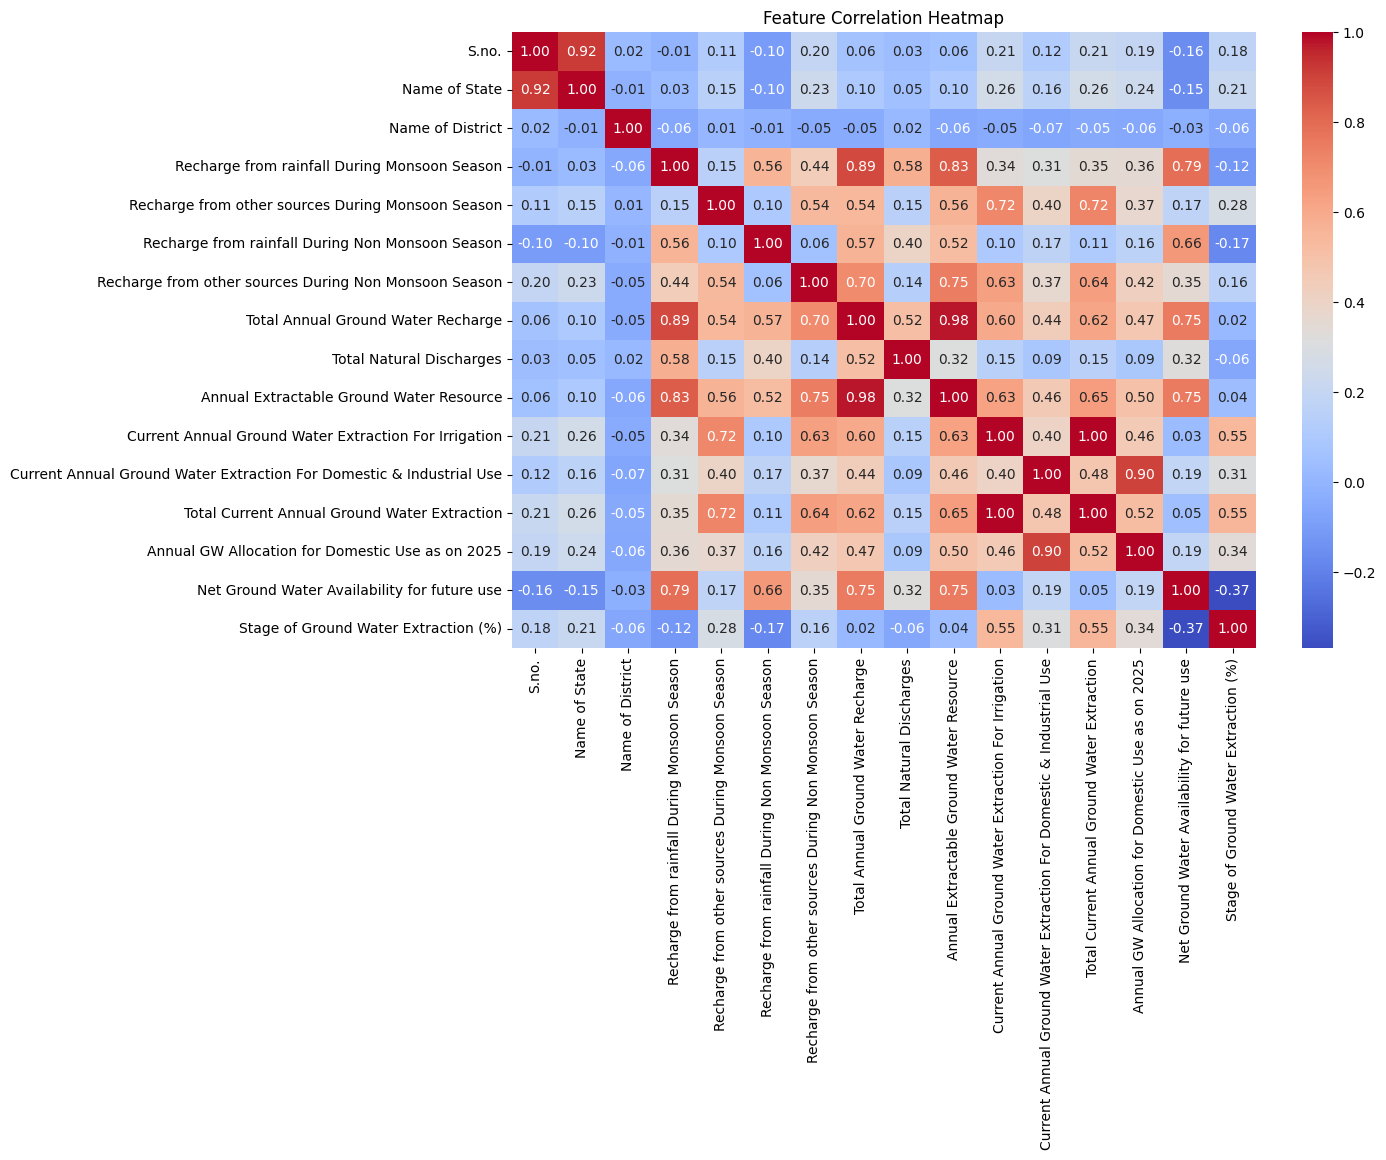

In [94]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [95]:
# Drop 'S.no' column from the dataframe
df = df.drop(columns=['S.no.'])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [97]:
# Define features and target variable
X = df.drop(columns=['Net Ground Water Availability for future use'])  # Drop the target column
y = df['Net Ground Water Availability for future use']  # Set the target column


In [98]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Save test features and target data to CSV
df_test_features = pd.DataFrame(X_test)
df_test_target = pd.DataFrame(y_test, columns=["Target"])

# Concatenate X_test and y_test into a single DataFrame
df_test = pd.concat([df_test_features, df_test_target], axis=1)

# Save to CSV file
csv_filename = "net_ground_water_test_data.csv"
df_test.to_csv(csv_filename, index=False)

csv_filename

'net_ground_water_test_data.csv'

In [100]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
# Save the scaler for later use
joblib.dump(scaler, "scaler1.pkl")

['scaler1.pkl']

In [102]:
# Initialize models
svm_model = SVR(kernel='rbf')
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate models
models = {"SVM": svm_model, "Random Forest": rf_model, "XGBoost": xgb_model}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }


In [103]:
# Train LSTM model
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

# Predict using LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
results["LSTM"] = {
    "MAE": mean_absolute_error(y_test, y_pred_lstm),
    "MSE": mean_squared_error(y_test, y_pred_lstm),
    "R2 Score": r2_score(y_test, y_pred_lstm)
}

Epoch 1/20


c:\Users\0931\.conda\envs\pythonproject\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1400903424.0000 - val_loss: 2272922112.0000
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1557580544.0000 - val_loss: 2272243456.0000
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1208390272.0000 - val_loss: 2271590912.0000
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1551741696.0000 - val_loss: 2270799616.0000
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1379634176.0000 - val_loss: 2269660416.0000
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1263413632.0000 - val_loss: 2268336640.0000
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1461699200.0000 - val_loss: 2266829056.0000
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1576647424.0000 - val_loss: 2265193216.0000
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1369702144.0000 - val_loss: 2263370240.0000
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1381070592.0000 - val_loss: 22613

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002837966CB80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [104]:
# Stacking Model (meta learner: XGBoost)
stacking_model = StackingRegressor(
    estimators=[('rf', rf_model), ('svm', svm_model), ('xgb', xgb_model)],
    final_estimator=XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
)
stacking_model.fit(X_train_scaled, y_train)

# Predict using Stacking model
y_pred_stacking = stacking_model.predict(X_test_scaled)
results["Stacking"] = {
    "MAE": mean_absolute_error(y_test, y_pred_stacking),
    "MSE": mean_squared_error(y_test, y_pred_stacking),
    "R2 Score": r2_score(y_test, y_pred_stacking)
}


In [105]:
# Save models
joblib.dump(svm_model, "svm_model1.pkl")
joblib.dump(rf_model, "rf_model1.pkl")
joblib.dump(xgb_model, "xgb_model1.pkl")
joblib.dump(stacking_model, "stacking_model1.pkl")
lstm_model.save("lstm_model1.h5")


In [106]:
# Print the evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print("-" * 50)


Model: SVM
R2 Score: -0.1252
MSE: 1555096178.6684
MAE: 21526.2987
--------------------------------------------------
Model: Random Forest
R2 Score: 0.8790
MSE: 167255792.7471
MAE: 4035.7534
--------------------------------------------------
Model: XGBoost
R2 Score: 0.8799
MSE: 165987215.9533
MAE: 4249.5807
--------------------------------------------------
Model: LSTM
R2 Score: -0.6154
MSE: 2232581413.4051
MAE: 29277.8865
--------------------------------------------------
Model: Stacking
R2 Score: 0.8658
MSE: 185518205.7458
MAE: 4623.6492
--------------------------------------------------
